Tier                    "ZU"
Predictions             "ZU"
Pokemon Name       "Lechonk"
Base Stat Total          254
Name: 632, dtype: object
Tier                     "ZU"
Predictions              "ZU"
Pokemon Name       "Impidimp"
Base Stat Total           265
Name: 551, dtype: object
Tier                   "ZU"
Predictions            "ZU"
Pokemon Name       "Eiscue"
Base Stat Total         470
Name: 325, dtype: object
Tier                     "ZU"
Predictions              "ZU"
Pokemon Name       "Drifloon"
Base Stat Total           348
Name: 298, dtype: object
Tier                     "OU"
Predictions              "RU"
Pokemon Name       "Blaziken"
Base Stat Total           530
Name: 103, dtype: object
Tier                     "ZU"
Predictions              "UU"
Pokemon Name       "Froslass"
Base Stat Total           480
Name: 404, dtype: object
Tier                       "ZU"
Predictions                "RU"
Pokemon Name       "Mabosstiff"
Base Stat Total             505
Name: 670, dty

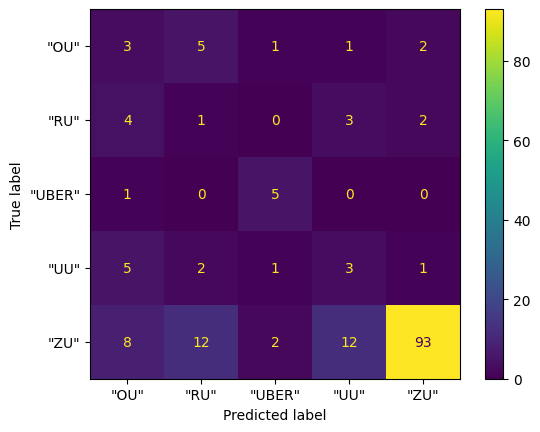

In [122]:
#Predicting Tier based off features
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
#Change this to your path to the CSV
data = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
#features = ["Legendary Type","Primary Type","Secondary Type","Game(s) of Origin","Health Stat","Attack Stat","Defense Stat","Special Attack Stat","Special Defense Stat","Speed Stat","Base Stat Total"]
data = data.dropna(subset="Tier")
irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      "Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                        "Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

#I removed "Pokemon Name" from above so I could check what pokemon where catogorized as what
data = data.drop(labels=irrelevantFeatures,axis=1)
#Below I removed legendary type 
#data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
features = data.columns.values[2:]
#print(features)

from sklearn.model_selection import train_test_split
#trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)


trainData, testData = train_test_split(data,test_size=0.2)
trainX = np.array(trainData[features])
testX = np.array(testData[features])
trainY = np.array(trainData["Tier"])
testY = np.array(testData["Tier"])



# for i in range(trainX.shape[1]):
#     plt.hist(trainX[0][i])
#     plt.hist(testX[0][i])
#plt.hist(trainY)
#plt.hist(testY)
#plt.show()

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',solver ='newton-cg',class_weight="balanced")


model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
for i, row in testData.iterrows():
    print(row[["Tier","Predictions","Pokemon Name","Base Stat Total"]])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matr = confusion_matrix(testData["Tier"],testData["Predictions"])
disp = ConfusionMatrixDisplay(conf_matr,display_labels=model.classes_)
disp.plot()
plt.show()



In [123]:
numberOfCoefs = 3
for i, tier in enumerate(model.classes_):
    print(tier)
    sortedCoefs = np.argsort(model.coef_[i])
    for k, coefficientIndex in enumerate(sortedCoefs[:numberOfCoefs]):
        print(features[coefficientIndex])
        print(model.coef_[i, coefficientIndex])
    for k, coefficientIndex in enumerate(sortedCoefs[-numberOfCoefs:]):
        print(features[coefficientIndex])
        print(model.coef_[i, coefficientIndex])
        


"OU"
Primary Type_"Electric"
-1.458578623159704
Primary Type_"Ghost"
-1.279086445313573
Secondary Type_"Normal"
-1.2671299351719811
Primary Type_"Ground"
0.942516604091969
Secondary Type_"Dark"
1.050583477663749
Primary Type_"Dragon"
1.2289227283658013
"RU"
Secondary Type_"Dark"
-1.5506222336644253
Secondary Type_"Ghost"
-1.421943956091903
Secondary Type_"Dragon"
-1.4206484609620322
Primary Type_"Bug"
0.9891749538518695
Secondary Type_"Fighting"
1.0010814246449145
Secondary Type_"Bug"
1.3818298065128312
"UBER"
Secondary Type_"Fighting"
-1.4887806191842288
Secondary Type_"Psychic"
-1.3105109236097547
Primary Type_"Dragon"
-0.939386721874554
Secondary Type_"Ice"
1.2532601825490541
Primary Type_"Ghost"
1.2812090555221705
Secondary Type_"Fire"
1.315100219023906
"UU"
Secondary Type_"Poison"
-1.3071600215792205
Primary Type_"Normal"
-1.0917275684850343
Secondary Type_"Fire"
-0.9490647697477611
Secondary Type_"Grass"
1.160098855765606
Secondary Type_"Fighting"
1.1881674958208017
Secondary Typ

Tier                   "ZU"
Predictions            "ZU"
Pokemon Name       "Komala"
Base Stat Total         480
Name: 602, dtype: object
Tier                    "ZU"
Predictions             "ZU"
Pokemon Name       "Snorunt"
Base Stat Total          300
Name: 1086, dtype: object
Tier                    "ZU"
Predictions             "ZU"
Pokemon Name       "Shuppet"
Base Stat Total          295
Name: 1038, dtype: object
Tier                       "OU"
Predictions                "OU"
Pokemon Name       "Great Tusk"
Base Stat Total             570
Name: 487, dtype: object
Tier                    "ZU"
Predictions             "ZU"
Pokemon Name       "Sliggoo"
Base Stat Total          452
Name: 1063, dtype: object
Tier                    "ZU"
Predictions             "ZU"
Pokemon Name       "Murkrow"
Base Stat Total          405
Name: 781, dtype: object
Tier                   "ZU"
Predictions            "RU"
Pokemon Name       "Pawmot"
Base Stat Total         490
Name: 852, dtype: object
Tier  

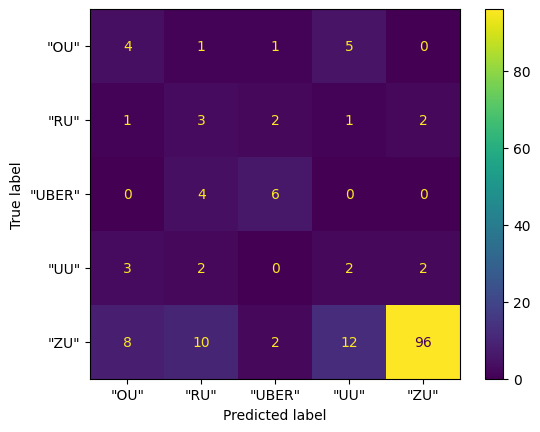

In [124]:
from sentence_transformers import SentenceTransformer

sentencesToVectors = SentenceTransformer("all-MiniLM-L6-v2")
#Change this to your path to the CSV
dataAgain = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
dataAgain = dataAgain.dropna(subset="Tier")

irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      #"Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                      "Pokemon Weight", "Primary Ability", "Secondary Ability", 
                        #"Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                        "Hidden Ability", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

dataAgain = dataAgain.drop(labels=irrelevantFeatures,axis=1)
dataAgain = pd.get_dummies(dataAgain,columns=["Primary Type","Secondary Type"])
features = dataAgain.columns.values[5:]
abilityFeatures = dataAgain.columns.values[2:5]
#print(features)
#print(abilityFeatures)

#x = np.array(data[features])
#y = np.array(data["Tier"])
#print(x)
#print(y)

from sklearn.model_selection import train_test_split
#trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)

dataAgain = dataAgain.fillna(value="")

trainData, testData = train_test_split(dataAgain,test_size=0.2)

trainX = np.array(trainData[features])
trainPrimaryEmbedings = sentencesToVectors.encode(list(trainData["Primary Ability Description"]))
trainSecondaryEmbedings = sentencesToVectors.encode(list(trainData["Secondary Ability Description"]))
trainHiddenEmbedings = sentencesToVectors.encode(list(trainData["Hidden Ability Description"]))
trainX = np.hstack([trainX, trainPrimaryEmbedings, trainSecondaryEmbedings, trainHiddenEmbedings])

testX = np.array(testData[features])
testPrimaryEmbedings = sentencesToVectors.encode(list(testData["Primary Ability Description"]))
testSecondaryEmbedings = sentencesToVectors.encode(list(testData["Secondary Ability Description"]))
testHiddenEmbedings = sentencesToVectors.encode(list(testData["Hidden Ability Description"]))
testX = np.hstack([testX, testPrimaryEmbedings, testSecondaryEmbedings, testHiddenEmbedings])

trainY = np.array(trainData["Tier"])
testY = np.array(testData["Tier"])



# for i in range(trainX.shape[1]):
#     plt.hist(trainX[0][i])
#     plt.hist(testX[0][i])
#plt.hist(trainY)
#plt.hist(testY)
#plt.show()

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',solver ='newton-cg',class_weight="balanced")


model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
for i, row in testData.iterrows():
    print(row[["Tier","Predictions","Pokemon Name","Base Stat Total"]])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matr = confusion_matrix(testData["Tier"],testData["Predictions"])
disp = ConfusionMatrixDisplay(conf_matr,display_labels=model.classes_)
disp.plot()
plt.show()

In [125]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
#Change this to your path to the CSV
data = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
#data = data.dropna(subset="Tier")
uniqueGames = data["Game(s) of Origin"].unique()
#print(uniqueGames)
gameToGen = {'"Diamond"':4,'"X"':6,'"Red"':1,'"Ruby"':3,'"Black"':5,'"Gold"':2,
    '"Sword"':8,'"Omega Ruby"':6,'"Scarlet"':9,'"Sun"':7,'"Legends Arceus"':8,
    '"Ultra Sun"':7,'"Fire Red"':3,'"Leaf Green"':3,'"Emerald"':3,'"Let\'s Go Pikachu"':7,'"Pokémon GO"':7,
    '"Platinum"':4,'"Violet"':8,'"Black 2"':5}
data["Gen"] = data["Game(s) of Origin"].apply(lambda x:gameToGen[x])

#data.loc[~data.index.isin(data.dropna(subset="Evolution Details").index)]

irrelevantFeatures = ["Tier", "Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      "Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                        "Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

data = data.drop(labels=irrelevantFeatures,axis=1)
#Below I removed legendary type 
#data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
#features = data.columns.values[2:]
features = [
    'Health Stat', 'Attack Stat', 'Defense Stat',
    'Special Attack Stat', 'Special Defense Stat', 'Speed Stat',
    'Base Stat Total', 'Primary Type_"Bug"', 'Primary Type_"Dark"',
    'Primary Type_"Dragon"', 'Primary Type_"Electric"', 'Primary Type_"Fairy"',
    'Primary Type_"Fighting"', 'Primary Type_"Fire"', 'Primary Type_"Flying"',
    'Primary Type_"Ghost"', 'Primary Type_"Grass"', 'Primary Type_"Ground"',
    'Primary Type_"Ice"', 'Primary Type_"Normal"', 'Primary Type_"Poison"',
    'Primary Type_"Psychic"', 'Primary Type_"Rock"', 'Primary Type_"Steel"',
    'Primary Type_"Water"', 'Secondary Type_"Bug"', 'Secondary Type_"Dark"',
    'Secondary Type_"Dragon"', 'Secondary Type_"Electric"',
    'Secondary Type_"Fairy"', 'Secondary Type_"Fighting"',
    'Secondary Type_"Fire"', 'Secondary Type_"Flying"',
    'Secondary Type_"Ghost"', 'Secondary Type_"Grass"',
    'Secondary Type_"Ground"', 'Secondary Type_"Ice"',
    'Secondary Type_"Normal"', 'Secondary Type_"Poison"',
    'Secondary Type_"Psychic"', 'Secondary Type_"Rock"',
    'Secondary Type_"Steel"', 'Secondary Type_"Water"'
]
#print(features)

from sklearn.model_selection import train_test_split
#trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)


trainData, testData = train_test_split(data,test_size=0.2)
trainX = np.array(trainData[features])
testX = np.array(testData[features])
trainY = np.array(trainData["Gen"])
testY = np.array(testData["Gen"])

from sklearn.linear_model import Ridge
model=Ridge(alpha=0.1)


model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
for i, row in testData.iterrows():
    print(row[["Pokemon Name","Gen","Predictions"]])


Pokemon Name    "Barbaracle"
Gen                        6
Predictions         5.802605
Name: 73, dtype: object
Pokemon Name    "Crawdaunt"
Gen                       3
Predictions        5.326329
Name: 224, dtype: object
Pokemon Name    "Machop"
Gen                    1
Predictions     4.980152
Name: 675, dtype: object
Pokemon Name    "Snorlax"
Gen                     1
Predictions      5.211341
Name: 1084, dtype: object
Pokemon Name    "Solrock"
Gen                     3
Predictions      5.255714
Name: 1094, dtype: object
Pokemon Name    "Elgyem"
Gen                    5
Predictions     3.348301
Name: 334, dtype: object
Pokemon Name    "Poltchageist"
Gen                          9
Predictions           6.510196
Name: 887, dtype: object
Pokemon Name    "Sinistcha"
Gen                       9
Predictions        6.953052
Name: 1046, dtype: object
Pokemon Name    "Skeledirge"
Gen                        9
Predictions         6.854324
Name: 1053, dtype: object
Pokemon Name    "Spearow"
Gen  

In [126]:
numberOfCoefs = 3
sortedCoefs = np.argsort(model.coef_)
for k, coefficientIndex in enumerate(sortedCoefs[:numberOfCoefs]):
    print(features[coefficientIndex])
    print(model.coef_[coefficientIndex])
for k, coefficientIndex in enumerate(sortedCoefs[-numberOfCoefs:]):
    print(features[coefficientIndex])
    print(model.coef_[coefficientIndex])

Primary Type_"Psychic"
-0.8500442842873974
Primary Type_"Water"
-0.8451415190589786
Primary Type_"Poison"
-0.8125671319958944
Secondary Type_"Bug"
2.265473625359717
Secondary Type_"Ghost"
2.346969491014893
Secondary Type_"Normal"
3.1605894959628515
